<a href="https://colab.research.google.com/github/mkatouda/mlsample/blob/main/boston_mlr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = np.array(boston.target)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

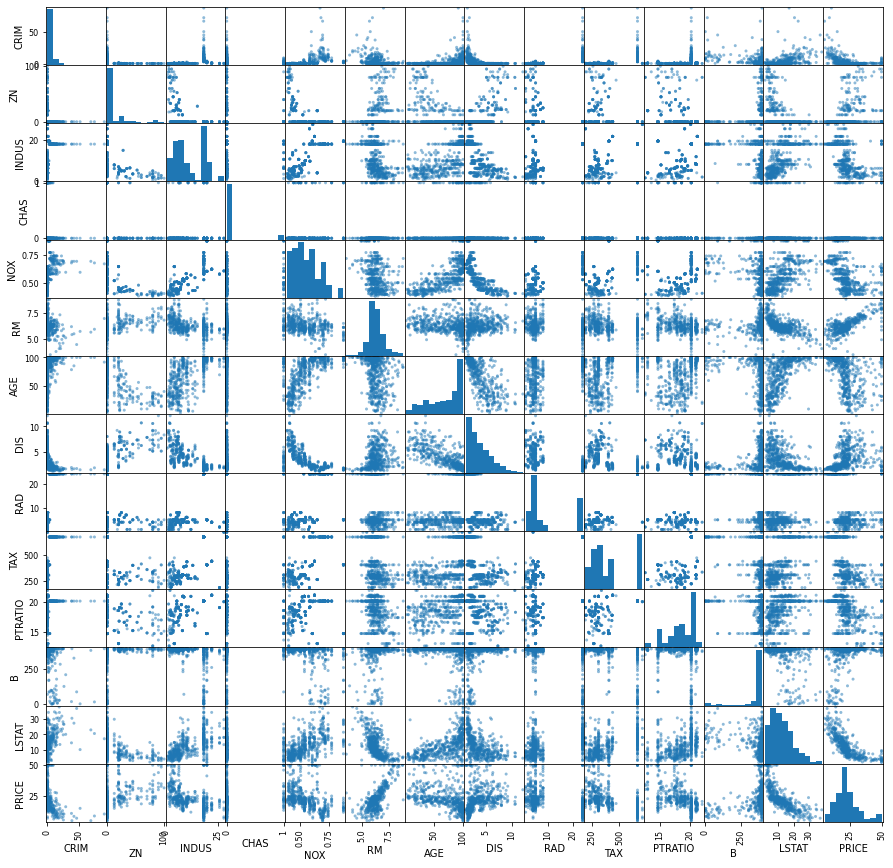

In [3]:
fig = pd.plotting.scatter_matrix(df, figsize=(15,15))

In [4]:
data = df.drop('PRICE', axis=1)
target = df.loc[:,'PRICE'].values
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
coeff_df = pd.DataFrame()
coeff_df["Features"] = df.columns[:-1]
coeff_df["Coefficient Estimate"] = model.coef_
print(coeff_df)

   Features  Coefficient Estimate
0      CRIM             -0.117735
1        ZN              0.044017
2     INDUS             -0.005768
3      CHAS              2.393416
4       NOX            -15.589421
5        RM              3.768968
6       AGE             -0.007035
7       DIS             -1.434956
8       RAD              0.240081
9       TAX             -0.011297
10  PTRATIO             -0.985547
11        B              0.008444
12    LSTAT             -0.499117


In [7]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('MSE Train : %.3f, Test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 Train : %.3f, Test : %.3f' % (model.score(X_train, y_train), model.score(X_test, y_test)))

MSE Train : 19.641, Test : 29.782
R^2 Train : 0.770, Test : 0.635


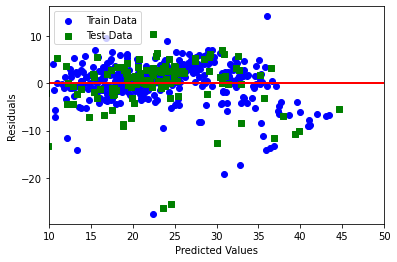

In [8]:
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Train Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'green', marker = 's', label = 'Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([10,50])
plt.show()

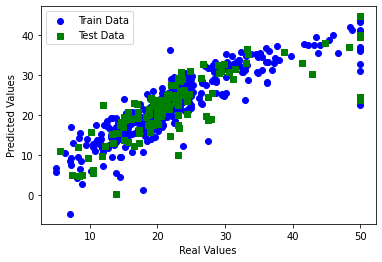

In [9]:
plt.scatter(y_train, y_train_pred, c = 'blue', marker = 'o', label = 'Train Data')
plt.scatter(y_test, y_test_pred, c = 'green', marker = 's', label = 'Test Data')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.legend(loc='upper left')
plt.show()